Take 3'UTR coordinates from hgTables, see
https://groups.google.com/a/soe.ucsc.edu/g/genome/c/3R59gKDrKu8

* add HGNC symbol (table from Biomart)
* remove irrelevant contigs (e.g. decoy sequences)
* take only contiguous UTR regions
* estimate 3'UTR length in Human genome

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16, 
                     'axes.titlesize':16, 'axes.labelsize':18})

In [2]:
data_dir = '/lustre/groups/epigenereg01/workspace/projects/vale/MLM/'

In [3]:
all_utr_df = pd.read_csv(data_dir + 'UTR_coords/GRCh38_3_prime_UTR.bed.gz', sep='\t', names=['chrom','start','stop','utr_name','score','strand'])

gene_annot_df = pd.read_csv(data_dir + 'UTR_coords/GRCh38_EnsembleCanonical_HGNC.tsv.gz', sep='\t', skiprows=1,header=None,
                           names=['transcript_id','canonical','HGNC_symbol'],usecols=[1,2,3]) #matching between Ensembl and HGNC gene names

all_utr_df['transcript_id'] = all_utr_df.utr_name.apply(lambda x:x.split('.')[0]) #transcript ID from UTR ID

df = all_utr_df.merge(gene_annot_df)

df = df[(df.canonical==1) & (~df.HGNC_symbol.isna())]#take only Ensembl canonical and with HGNC symbol

df = df[~df.chrom.str.contains('_')] #exclude decoy seqeunces, etc

df.drop_duplicates(subset=['transcript_id'],keep=False,inplace=True) #take only UTR regions that are not splitted

Text(5000, 1500, '≈93pct.\n 5000bp')

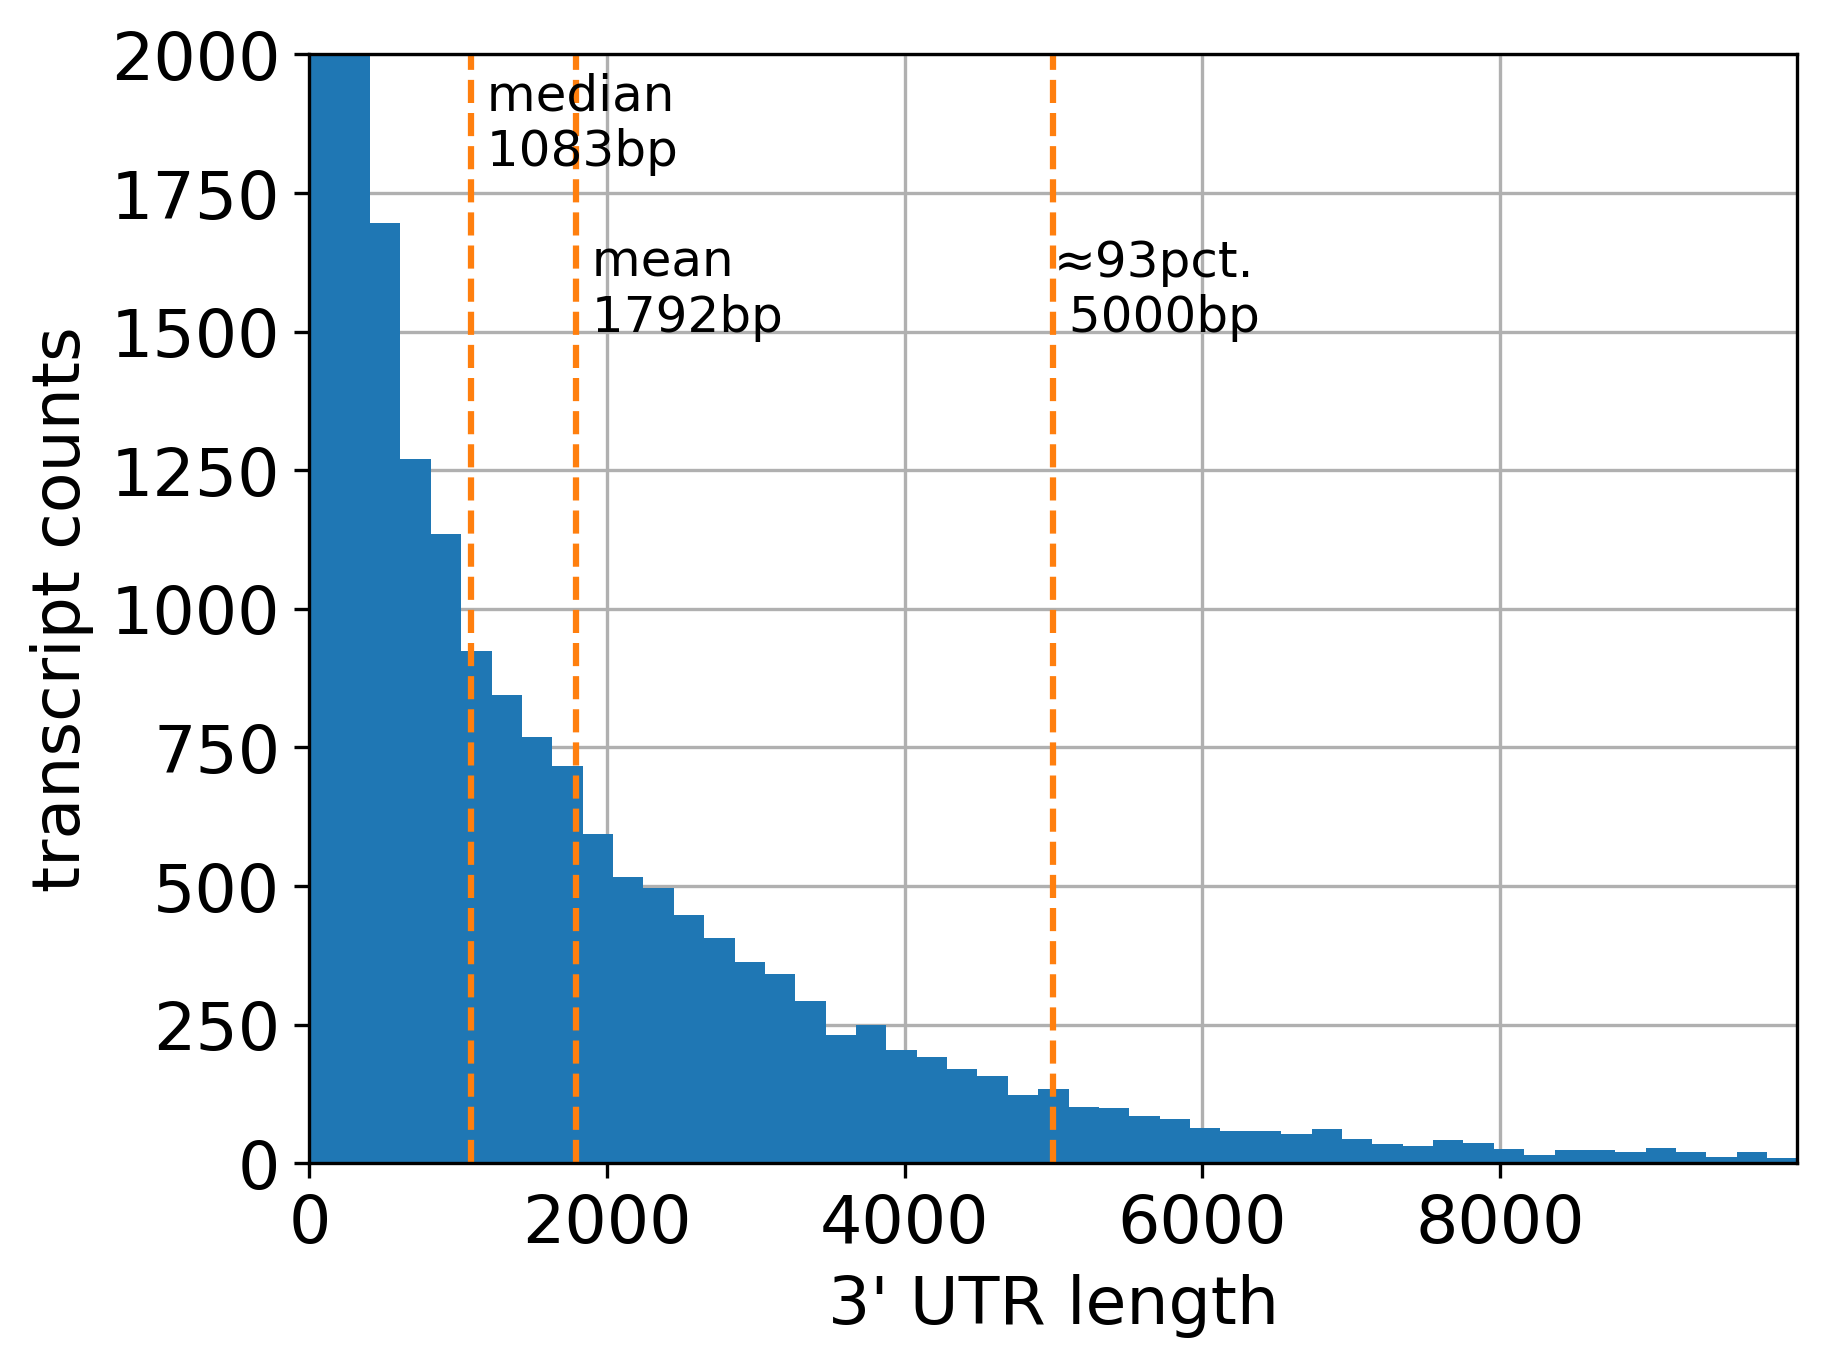

In [10]:
df['length'] = df.stop-df.start

fig, ax = plt.subplots(dpi=300)

#df['length'].hist(bins=np.logspace(0,5))
df['length'].hist(bins=np.linspace(0,10000))

ax.set_xlabel("3' UTR length", fontsize=16)
ax.set_ylabel("transcript counts", fontsize=16)
ax.set_axisbelow(True)

#ax.set_xscale('log')

ax.set_ylim([0,2000])
ax.set_xlim([0,10000-1])

med = df['length'].median()

ax.plot(med*np.ones((50,)),np.linspace(0,2010,50),linestyle='--')
ax.text(med,1800,f' median\n {int(med)}bp', fontsize=12)

mean = df['length'].mean()

ax.plot(mean*np.ones((50,)),np.linspace(0,2010,50),linestyle='--',color='tab:orange')
ax.text(mean,1500,f' mean\n {int(mean)}bp', fontsize=12)

ax.plot(5000*np.ones((50,)),np.linspace(0,2010,50),linestyle='--',color='tab:orange')
ax.text(5000,1500,f'≈93pct.\n 5000bp', fontsize=12)

In [70]:
df.to_csv('UTR_coords/GRCh38_3_prime_UTR_clean.bed',sep='\t',index=None,header=None)

In [10]:
s=pd.read_csv('/s/project/mll/sergey/MLM/UTR_coords/GRCh38_3_prime_UTR_clean.bed',sep='\t').iloc[:,-1]

In [17]:
np.percentile(s,95)

5754.200000000001

In [16]:
s.sort_values().tail(20)

17566    17786
7440     17827
2097     17872
2058     17983
3865     18021
8838     18123
5818     18839
7347     19497
11286    19545
13223    19695
5680     21630
256      22477
5004     22561
11494    22929
11292    23622
12640    24213
3286     24505
11262    25446
12629    30931
15577    32870
Name: 840, dtype: int64